In [84]:
push!(LOAD_PATH, "../src/")
import MockKepler
import plotting
using PyPlot
import utils
reload("plotting")
reload("MockKepler")

In [2]:
combo_file = "/Users/johncmoriarty/AeroFS/Projects/KeplerDichotomy/ParameterizedInsideOut/data/combos_1.5.json"

"/Users/johncmoriarty/AeroFS/Projects/KeplerDichotomy/ParameterizedInsideOut/data/combos_1.5.json"

In [3]:
combos, mocked_stars = MockKepler.load_combos(combo_file);

In [4]:
stars, kois, inj = MockKepler.subsample();

In [5]:
sims = MockKepler.load_sims("../data/final_planets_1.5.csv");
sim_array = MockKepler.sims_as_array(sims);

In [6]:
reps = MockKepler.load_representatives("../data/representatives.txt");

In [7]:
mult_probs = MockKepler.simulated_multiplicity_probs(combos);

In [8]:
sample_kepids = stars[:kepid].data
observed_mult = MockKepler.observed_multiplicity(sample_kepids, kois);

In [9]:
sample_combo_indices = MockKepler.kepid_to_combo_index(sample_kepids, mocked_stars, reps);
camp = MockKepler.SimulatedCampaign(combos, sample_kepids, sample_combo_indices, sim_array);

Acceptance Rate: 0.681
Average number of observed systems: 1510.72


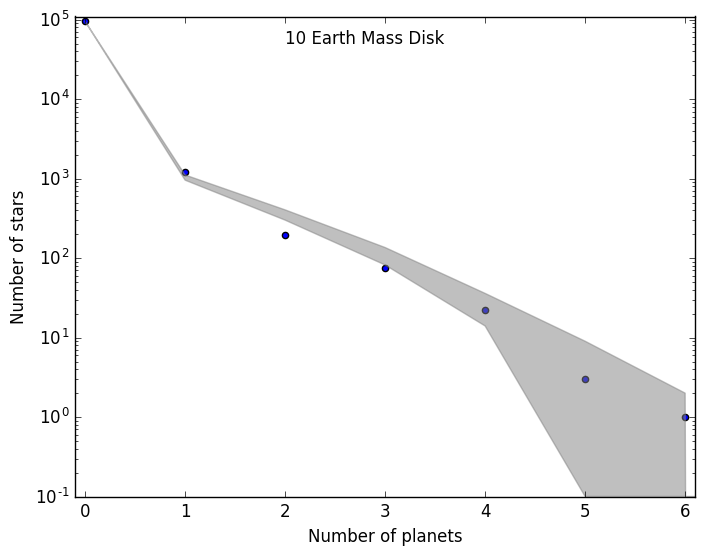

PyObject <matplotlib.text.Text object at 0x3424d9a10>

In [85]:
function f(p)
    MockKepler.multiplicity_lnl([p[1], 0, 0, 0], sample_combo_indices, observed_mult, mult_probs)
end
chain, lnl = utils.basicMCMC(f, [1], 1000, proposal_width=.004);
plotting.plot_model_multiplicity([chain[1,end],0,0,0], camp, observed_mult);
PyPlot.text(2,50000,"10 Earth Mass Disk")

Acceptance Rate: 0.59
Average number of observed systems: 1499.51


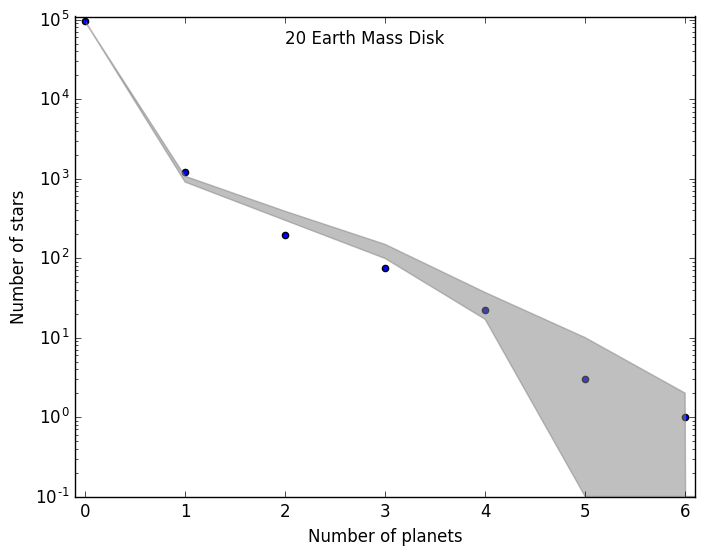

PyObject <matplotlib.text.Text object at 0x341660690>

In [86]:
function f(p)
    MockKepler.multiplicity_lnl([0, p[1], 0, 0], sample_combo_indices, observed_mult, mult_probs)
end
chain, lnl = utils.basicMCMC(f, [1], 1000, proposal_width=.004);
plotting.plot_model_multiplicity([0,chain[1,end],0,0], camp, observed_mult);
PyPlot.text(2,50000,"20 Earth Mass Disk")

Acceptance Rate: 0.618
Average number of observed systems: 1530.57


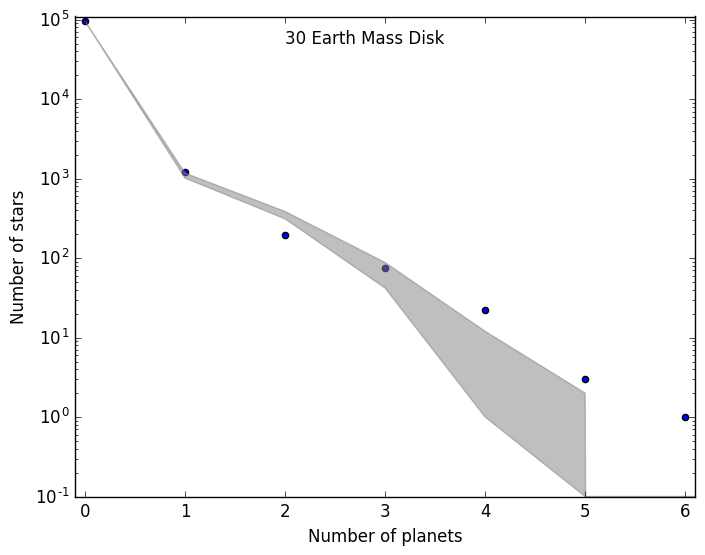

PyObject <matplotlib.text.Text object at 0x342de7990>

In [87]:
function f(p)
    MockKepler.multiplicity_lnl([0, 0, p[1], 0], sample_combo_indices, observed_mult, mult_probs)
end
chain, lnl = utils.basicMCMC(f, [1], 1000, proposal_width=.004);
plotting.plot_model_multiplicity([0,0,chain[1,end],0], camp, observed_mult);
PyPlot.text(2,50000,"30 Earth Mass Disk")

Acceptance Rate: 0.644
Average number of observed systems: 1475.0


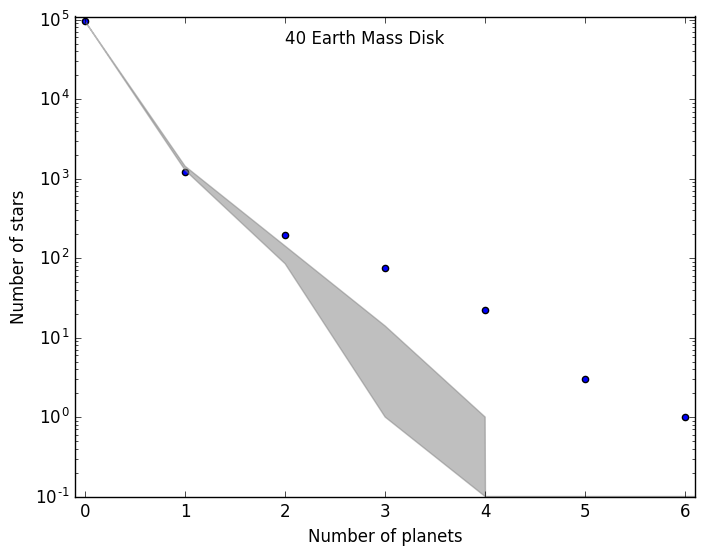

PyObject <matplotlib.text.Text object at 0x343196e50>

In [88]:
function f(p)
    MockKepler.multiplicity_lnl([0, 0, 0, p[1]], sample_combo_indices, observed_mult, mult_probs)
end
chain, lnl = utils.basicMCMC(f, [1], 1000, proposal_width=.004);
plotting.plot_model_multiplicity([0,0,0,chain[1,end]], camp, observed_mult);
PyPlot.text(2,50000,"40 Earth Mass Disk")

In [36]:
function f(p)
    MockKepler.multiplicity_lnl(p, sample_combo_indices, observed_mult, mult_probs)
end
# chain, lnl = utils.basicMCMC(f, [.1,.1,.1,.1], 1000, proposal_width=.0002);
chain, lnl = utils.basicMCMC(f, chain[:,end], 10000, proposal_width=.004);

Acceptance Rate: 0.4738


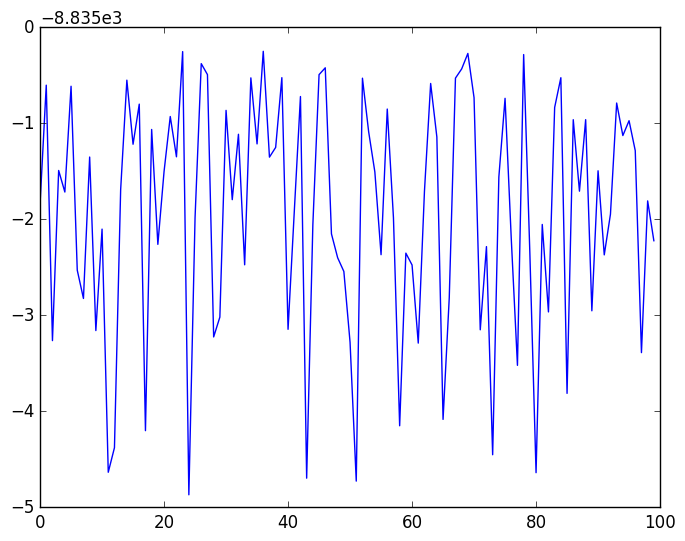

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x338450a50>

In [37]:
PyPlot.plot(lnl[1:100:end])

In [64]:
reload("plotting")

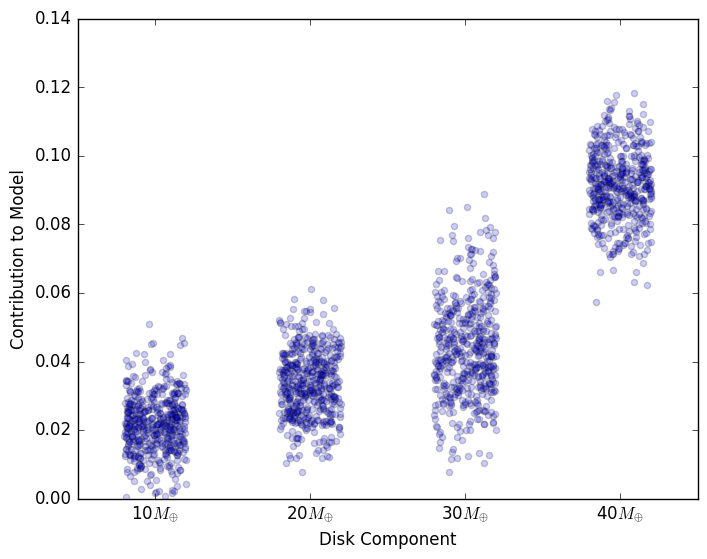

In [65]:
plotting.plot_chain(chain)

Average number of observed systems: 1486.91


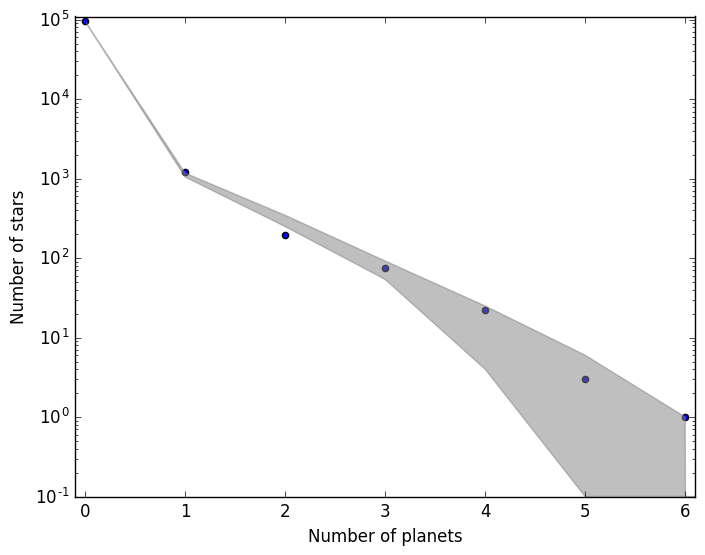

In [89]:
plotting.plot_model_multiplicity(chain[:,end], camp, observed_mult);

In [69]:
hosts, planets = MockKepler.mock_campaign(camp.combos, camp.stars, camp.star_index, MockKepler.sims_from_model(chain[:,end], length(camp.star_index)), camp.planets);

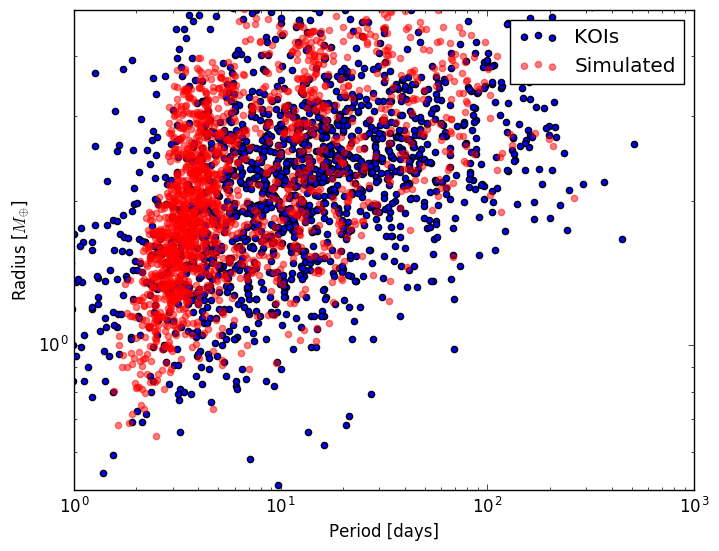

PyObject <matplotlib.legend.Legend object at 0x3434c5890>

In [98]:
plotting.plot_period_radius(kois, planets)

In [97]:
reload("plotting")

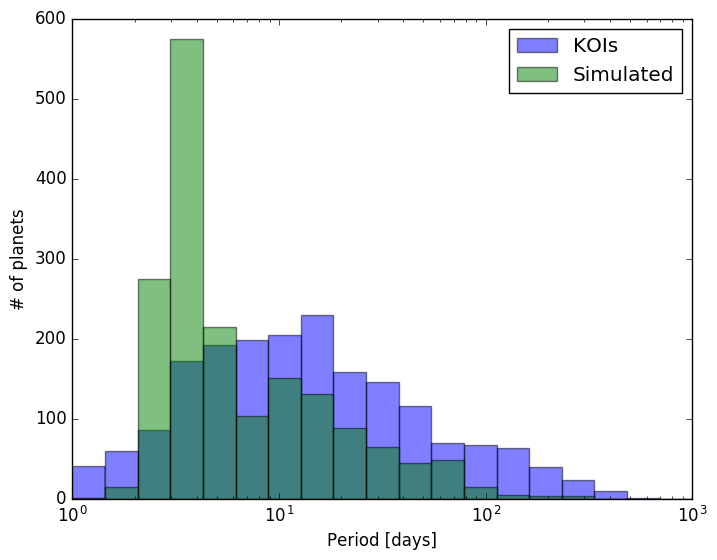

PyObject <matplotlib.legend.Legend object at 0x33c0f12d0>

In [72]:
plotting.plot_period_dist(kois, planets)

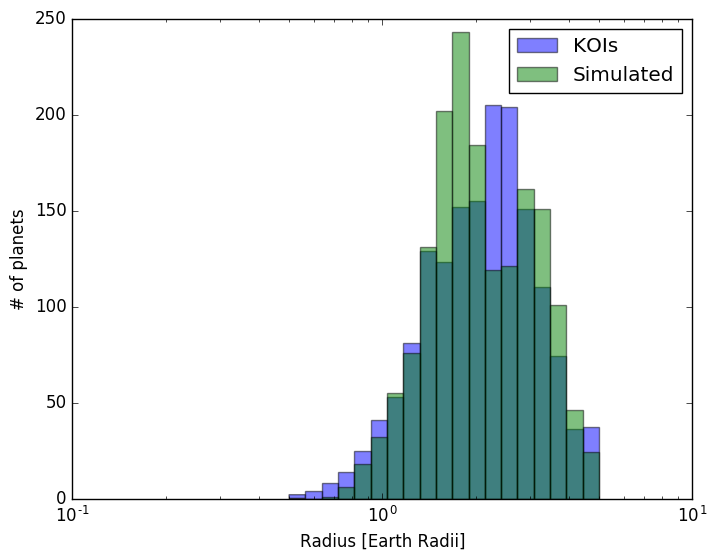

PyObject <matplotlib.legend.Legend object at 0x340cff250>

In [73]:
plotting.plot_radius_dist(kois, planets)

In [24]:
plotting.plot_all(chain[:,end-100:end], camp, kois)

LoadError: LoadError: UndefVarError: chain not defined
while loading In[24], in expression starting on line 1